Lecture 8,
Dyna-Q on a Simple Maze

In [1]:
import numpy as np
import random

def epsilon():
    a = random.randrange(1,11)
    if a == 1:
        return True
    else:
        return False

def epsilon_greedy(Q_table,S):
    if epsilon()==True:
        return random.randrange(0,4)
    else:
        return np.argmax(Q_table[S])
    
def execute(S,A): #######environment#######
    if S == (1,8) and A == 0:
        return 1, (-1,-1)
    
    if A == 0:
        if S[0]==0 or S==(4,2) or S==(5,5) or S==(3,7):
            return 0, S
        else:
            return 0, (S[0]-1,S[1])
    elif A == 1:
        if S[1]==8 or S==(1,1) or S==(2,1) or S==(3,1) or S==(0,6) or S==(1,6) or S==(2,6) or S==(4,4):
            return 0, S
        else:
            return 0, (S[0],S[1]+1)
    elif A == 2:
        if S[0]==5 or S==(0,2) or S==(3,5):
            return 0, S
        else:
            return 0, (S[0]+1,S[1])
    elif A == 3:
        if S[1]==0 or S==(1,3) or S==(2,3) or S==(3,3) or S==(4,6) or S==(1,8) or S==(2,8):
            return 0, S
        else:
            return 0, (S[0],S[1]-1)
        
def Dyna_Q(Q_table, n, step_per_episode, episodes, Model):
    for episode in range(episodes):
        step = 0
        S = (2,0)
        A = epsilon_greedy(Q_table, S)
        while True:
            R, S_prime = execute(S,A)
            step += 1
            Q_table[S][A] = Q_table[S][A] + 0.1*(R + 0.95*np.max(Q_table[S_prime])-Q_table[S][A])
            Model = np.concatenate((Model, np.array([[S[0],S[1],A,R,S_prime[0],S_prime[1]]])))
            for i in range(n):
                random_tuple = Model[random.randrange(1,Model.shape[0])]
                S_previouse = tuple(random_tuple[:2])
                A_previouse = random_tuple[2]
                candidate = np.array([[-1,-1,-1]])
                for j in range(1, Model.shape[0]):
                    if Model[j,0]==S_previouse[0] and Model[j,1]==S_previouse[1] and Model[j,2]==A_previouse:
                        candidate = np.concatenate((candidate,Model[j][3:].reshape(1,-1)))
                Model_tuple = candidate[random.randrange(1,candidate.shape[0])]
                R_model = Model_tuple[0]
                S_prime_model = tuple(Model_tuple[1:])
                Q_table[S_previouse][A_previouse] = Q_table[S_previouse][A_previouse] + 0.1*(R_model + 0.95*np.max(Q_table[S_prime_model])-Q_table[S_previouse][A_previouse])
            if R == 1:
                break
            S = S_prime
            A = epsilon_greedy(Q_table, S)
        print('n:',n,'step:',step)
        step_per_episode.append(step)

Alternative table lookup model referenced in lecture note. (randomly pick tuple matching <s a . .>)

In [2]:
Q_table = np.random.normal(scale=0.01,size=(6,9,4))
Model = np.array([[-1,-1,-1,-1,-1,-1]]) #S, A, R, S'
n = 0
episodes = 50
step_per_episode1 = []
Dyna_Q(Q_table, n, step_per_episode1, episodes, Model)

Q_table = np.random.normal(scale=0.01,size=(6,9,4))
Model = np.array([[-1,-1,-1,-1,-1,-1]]) #S, A, R, S'
n = 5
episodes = 50
step_per_episode2 = []
Dyna_Q(Q_table, n, step_per_episode2, episodes, Model)

Q_table = np.random.normal(scale=0.01,size=(6,9,4))
Model = np.array([[-1,-1,-1,-1,-1,-1]]) #S, A, R, S'
n = 50
episodes = 50
step_per_episode3 = []
Dyna_Q(Q_table, n, step_per_episode3, episodes, Model)

n: 0 step: 1563
n: 0 step: 1312
n: 0 step: 2167
n: 0 step: 99
n: 0 step: 194
n: 0 step: 44
n: 0 step: 222
n: 0 step: 73
n: 0 step: 50
n: 0 step: 49
n: 0 step: 120
n: 0 step: 99
n: 0 step: 131
n: 0 step: 66
n: 0 step: 56
n: 0 step: 61
n: 0 step: 28
n: 0 step: 67
n: 0 step: 132
n: 0 step: 51
n: 0 step: 47
n: 0 step: 50
n: 0 step: 85
n: 0 step: 270
n: 0 step: 64
n: 0 step: 43
n: 0 step: 38
n: 0 step: 37
n: 0 step: 31
n: 0 step: 76
n: 0 step: 25
n: 0 step: 46
n: 0 step: 25
n: 0 step: 68
n: 0 step: 20
n: 0 step: 39
n: 0 step: 22
n: 0 step: 48
n: 0 step: 16
n: 0 step: 28
n: 0 step: 23
n: 0 step: 25
n: 0 step: 20
n: 0 step: 23
n: 0 step: 29
n: 0 step: 22
n: 0 step: 21
n: 0 step: 22
n: 0 step: 22
n: 0 step: 21
n: 5 step: 10377
n: 5 step: 309
n: 5 step: 115
n: 5 step: 22
n: 5 step: 68
n: 5 step: 108
n: 5 step: 26
n: 5 step: 20
n: 5 step: 28
n: 5 step: 18
n: 5 step: 28
n: 5 step: 22
n: 5 step: 18
n: 5 step: 34
n: 5 step: 18
n: 5 step: 18
n: 5 step: 18
n: 5 step: 19
n: 5 step: 19
n: 5 step: 18
n:

X-axis : episode, Y-axis : Step per episode

<function matplotlib.pyplot.show(*args, **kw)>

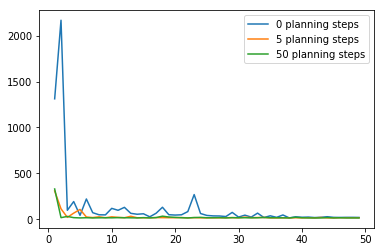

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(step_per_episode1)), step_per_episode1[1:], label = '0 planning steps')
plt.plot(range(1,len(step_per_episode2)), step_per_episode2[1:], label = '5 planning steps')
plt.plot(range(1,len(step_per_episode3)), step_per_episode3[1:], label = '50 planning steps')
plt.legend(loc='upper right')
plt.show

Optimal policy from 50 episode training and 50 planning per one step

In [5]:
S = (2,0)
A = np.argmax(Q_table[S])
print('State : ', S, 'Action : ', A, 'Q : ', Q_table[S][A])
while True:
    R,S = execute(S,A)
    A = np.argmax(Q_table[S])
    print('State : ', S, 'Action : ', A, 'Q : ', Q_table[S][A])
    if R==1:break

State :  (2, 0) Action :  0 Q :  1.0012322400372473
State :  (1, 0) Action :  0 Q :  1.061092176598534
State :  (0, 0) Action :  1 Q :  1.1323264831984334
State :  (0, 1) Action :  1 Q :  1.2075967737524407
State :  (0, 2) Action :  1 Q :  1.286536532336392
State :  (0, 3) Action :  2 Q :  1.3612331833877351
State :  (1, 3) Action :  1 Q :  1.4480947775188244
State :  (1, 4) Action :  1 Q :  1.5412325501654718
State :  (1, 5) Action :  2 Q :  1.6382910295023745
State :  (2, 5) Action :  1 Q :  1.740154603883173
State :  (2, 6) Action :  2 Q :  1.8549506311253237
State :  (3, 6) Action :  1 Q :  1.9754886252727692
State :  (3, 7) Action :  1 Q :  2.1073759657196796
State :  (3, 8) Action :  0 Q :  2.2326961409602313
State :  (2, 8) Action :  0 Q :  2.370618120879785
State :  (1, 8) Action :  0 Q :  2.5102949838400077
State :  (-1, -1) Action :  0 Q :  1.6181486617189609
